In [2]:
%matplotlib inline

In [4]:
# coding=utf-8
import pandas as pd
import os 
import arrow as ar
import  matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pyplotz.pyplotz import PyplotZ #一个优化matplotlib函数操作的package
import numpy as np
plt.style.use('fivethirtyeight')
from palettable.colorbrewer.sequential import Blues_9,BuGn_9,Greys_3,PuRd_5#三种配色的调色板
import warnings
myfont = matplotlib.font_manager.FontProperties(fname='/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc',size = 18)
warnings.filterwarnings('ignore')
os.chdir('/home/user1/tianchi-CBE')
pltz=PyplotZ()

train=pd.read_csv('./data/Antai_AE_round1_train_20190626.csv')
trainxx = train[train['buyer_country_id'] == 'xx']
trainyy = train[train['buyer_country_id'] == 'yy']
test=pd.read_csv('./data/Antai_AE_round1_test_20190626.csv')
item_attr=pd.read_csv('./data/Antai_AE_round1_item_attr_20190626.csv')

In [7]:
print('训练集中xx国一共有'+str(len(trainxx))+'个样本'+',yy国一共有'+str(len(trainyy))+'个样本')
print('测试集(yy国)一共有'+str(len(test))+'个样本')
print('商品属性表一共有'+str(len(item_attr))+'个商品')

训练集中xx国一共有10635642个样本,yy国一共有2232867个样本
测试集(yy国)一共有166832个样本
商品属性表一共有2832669个商品


In [15]:
print('训练集(xx国)中有'+str(len(trainxx['item_id'].unique()))+'不同的商品,以及'+str(len(trainxx['buyer_admin_id'].unique()))+'个不同的用户')
print('训练集(yy国)中有'+str(len(trainyy['item_id'].unique()))+'不同的商品,以及'+str(len(trainyy['buyer_admin_id'].unique()))+'个不同的用户')
print('商品属性表中商品有'+str(len(item_attr['cate_id'].unique()))+'个不同的类别,以及'+str(len(item_attr['store_id'].unique()))+'个不同的店铺')

训练集(xx国)中有2294361不同的商品,以及670631个不同的用户
训练集(yy国)中有926771不同的商品,以及138678个不同的用户
商品属性表中商品有4243个不同的类别,以及95105个不同的店铺


In [2]:
#探查下出现频率最高的各类型id
print('训练集(xx国)中出现次数最高的各类型id:')
for x in ['buyer_admin_id','item_id','create_order_time']:
    print('对于'+x+':')
    print(trainxx[x].value_counts().head())
    
print('训练集(yy国)中出现次数最高的各类型id:')
for x in ['buyer_admin_id','item_id','create_order_time']:
    print('对于'+x+':')
    print(trainyy[x].value_counts().head())

训练集(xx国)中出现次数最高的各类型id:
对于buyer_admin_id:


10828801    42751
10951390    23569
11223615    19933
10935073    13820
10683645    13210
Name: buyer_admin_id, dtype: int64
对于item_id:


12691565    112659
12824199     35979
12673275     14668
12891086     12335
634028        7900
Name: item_id, dtype: int64
对于create_order_time:


2018-08-27 00:05:44    210
2018-08-27 00:05:12    196
2018-08-27 00:08:14    190
2018-08-27 00:05:30    188
2018-08-03 10:07:47    185
Name: create_order_time, dtype: int64
训练集(yy国)中出现次数最高的各类型id:
对于buyer_admin_id:
2381782     3480
2333316     1944
2365356     1686
2190552     1467
12355554    1255
Name: buyer_admin_id, dtype: int64
对于item_id:
11717821    1415
11140901    1381
10389160    1275
11680535    1202
2850195     1196
Name: item_id, dtype: int64
对于create_order_time:


2018-08-30 14:54:28    121
2018-08-28 11:56:13    104
2018-08-03 09:14:17    102
2018-08-31 13:09:05    101
2018-08-28 16:41:23    101
Name: create_order_time, dtype: int64


In [3]:
print(test[test['irank'] == 1])

训练集(xx国)中出现次数最高的各类型id:
对于buyer_admin_id:


10828801    42751
10951390    23569
11223615    19933
10935073    13820
10683645    13210
Name: buyer_admin_id, dtype: int64
对于item_id:


12691565    112659
12824199     35979
12673275     14668
12891086     12335
634028        7900
Name: item_id, dtype: int64
对于create_order_time:


2018-08-27 00:05:44    210
2018-08-27 00:05:12    196
2018-08-27 00:08:14    190
2018-08-27 00:05:30    188
2018-08-03 10:07:47    185
Name: create_order_time, dtype: int64
训练集(yy国)中出现次数最高的各类型id:
对于buyer_admin_id:
2381782     3480
2333316     1944
2365356     1686
2190552     1467
12355554    1255
Name: buyer_admin_id, dtype: int64
对于item_id:
11717821    1415
11140901    1381
10389160    1275
11680535    1202
2850195     1196
Name: item_id, dtype: int64
对于create_order_time:


2018-08-30 14:54:28    121
2018-08-28 11:56:13    104
2018-08-03 09:14:17    102
2018-08-31 13:09:05    101
2018-08-28 16:41:23    101
Name: create_order_time, dtype: int64


In [5]:
print('商品价格表信息：')
print(item_attr.info())


训练集(xx国)中出现次数最高的各类型id:
对于buyer_admin_id:


10828801    42751
10951390    23569
11223615    19933
10935073    13820
10683645    13210
Name: buyer_admin_id, dtype: int64
对于item_id:


12691565    112659
12824199     35979
12673275     14668
12891086     12335
634028        7900
Name: item_id, dtype: int64
对于create_order_time:


2018-08-27 00:05:44    210
2018-08-27 00:05:12    196
2018-08-27 00:08:14    190
2018-08-27 00:05:30    188
2018-08-03 10:07:47    185
Name: create_order_time, dtype: int64
训练集(yy国)中出现次数最高的各类型id:
对于buyer_admin_id:
2381782     3480
2333316     1944
2365356     1686
2190552     1467
12355554    1255
Name: buyer_admin_id, dtype: int64
对于item_id:
11717821    1415
11140901    1381
10389160    1275
11680535    1202
2850195     1196
Name: item_id, dtype: int64
对于create_order_time:


2018-08-30 14:54:28    121
2018-08-28 11:56:13    104
2018-08-03 09:14:17    102
2018-08-31 13:09:05    101
2018-08-28 16:41:23    101
Name: create_order_time, dtype: int64


In [8]:
train_merge=pd.merge(train,item_attr,on='item_id',how='left')
print('商品属性表对全体训练集的覆盖率为：'+str(train_merge.count()['cate_id']/train_merge.count()['buyer_admin_id']))
trainxx_merge=pd.merge(trainxx,item_attr,on='item_id',how='left')
print('商品属性表对训练集xx的覆盖率为：'+str(trainxx_merge.count()['cate_id']/trainxx_merge.count()['buyer_admin_id']))
trainyy_merge=pd.merge(trainyy,item_attr,on='item_id',how='left')
print('商品属性表对训练集xx的覆盖率为：'+str(trainyy_merge.count()['cate_id']/trainyy_merge.count()['buyer_admin_id']))

训练集(xx国)中出现次数最高的各类型id:
对于buyer_admin_id:


10828801    42751
10951390    23569
11223615    19933
10935073    13820
10683645    13210
Name: buyer_admin_id, dtype: int64
对于item_id:


12691565    112659
12824199     35979
12673275     14668
12891086     12335
634028        7900
Name: item_id, dtype: int64
对于create_order_time:


2018-08-27 00:05:44    210
2018-08-27 00:05:12    196
2018-08-27 00:08:14    190
2018-08-27 00:05:30    188
2018-08-03 10:07:47    185
Name: create_order_time, dtype: int64
训练集(yy国)中出现次数最高的各类型id:
对于buyer_admin_id:
2381782     3480
2333316     1944
2365356     1686
2190552     1467
12355554    1255
Name: buyer_admin_id, dtype: int64
对于item_id:
11717821    1415
11140901    1381
10389160    1275
11680535    1202
2850195     1196
Name: item_id, dtype: int64
对于create_order_time:


2018-08-30 14:54:28    121
2018-08-28 11:56:13    104
2018-08-03 09:14:17    102
2018-08-31 13:09:05    101
2018-08-28 16:41:23    101
Name: create_order_time, dtype: int64


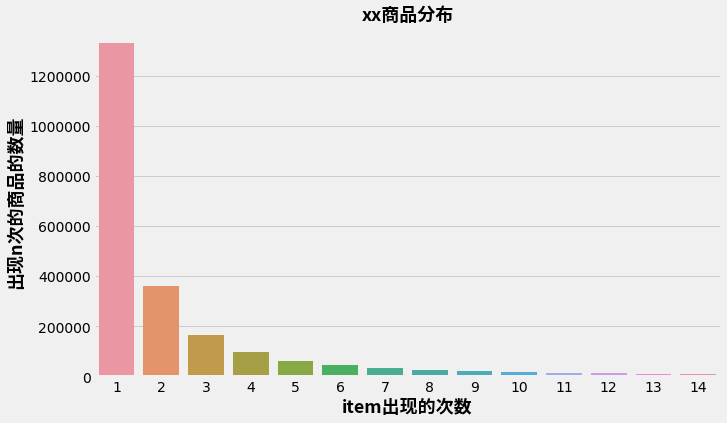

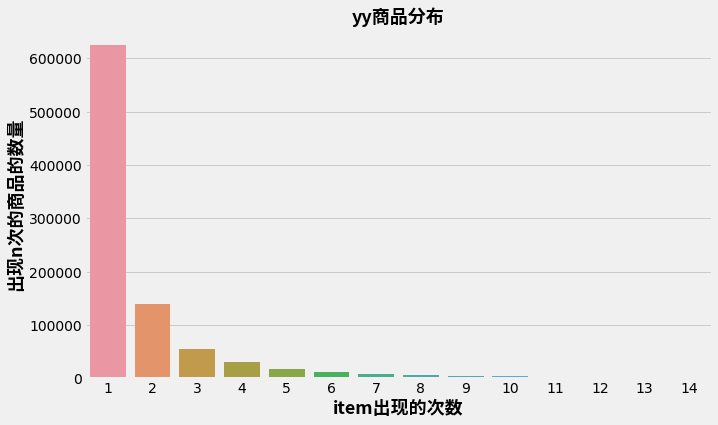

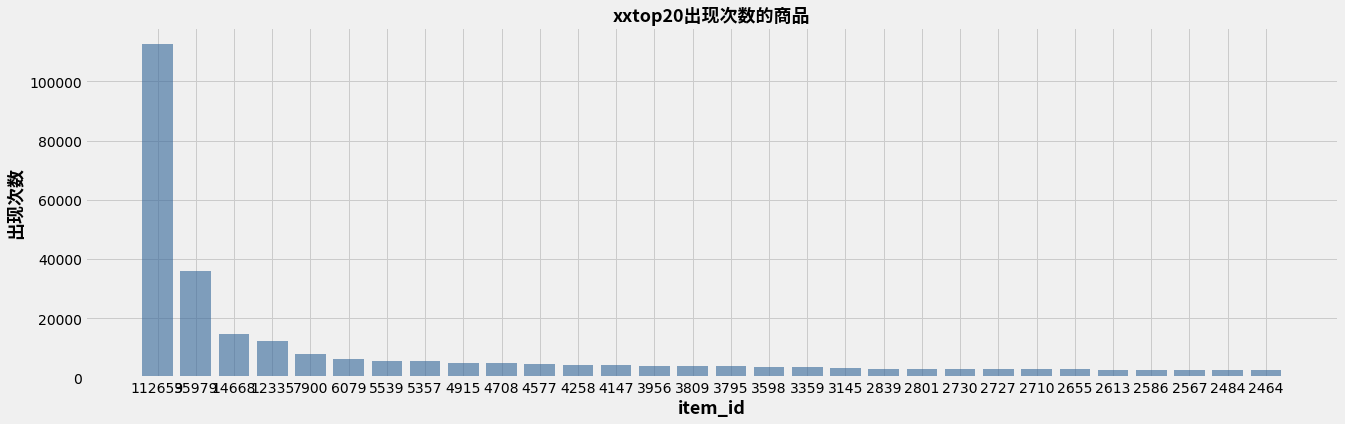

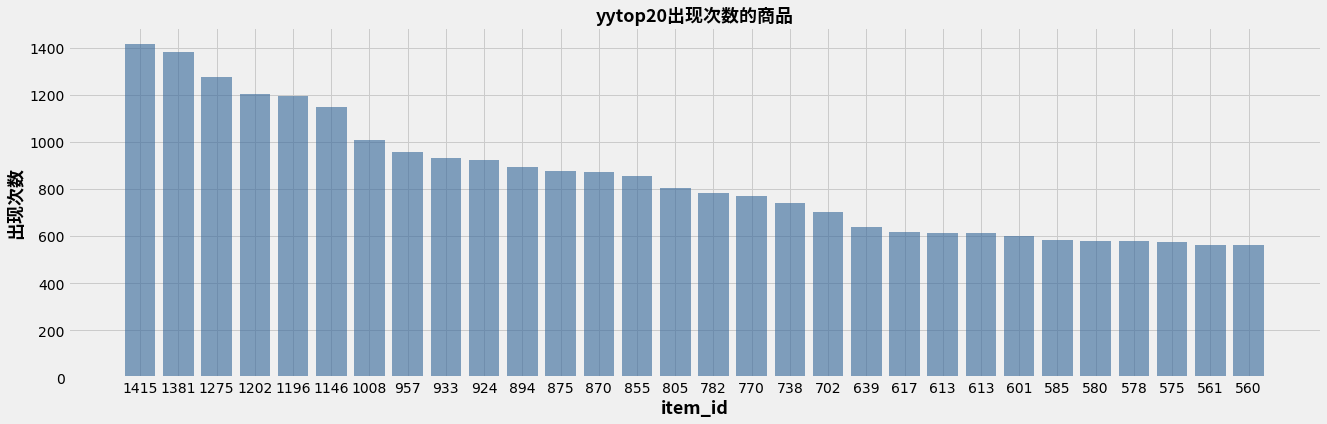

In [12]:

fig, axis1 = plt.subplots(1,1,figsize=(10,6))
item_num=pd.DataFrame({'item_id_num':trainxx['item_id'].value_counts().values})
sns.countplot(x='item_id_num',data=item_num[item_num['item_id_num']<15])
axis1.set_xlabel(u'item出现的次数',fontproperties=myfont)
axis1.set_ylabel(u'出现n次的商品的数量',fontproperties=myfont)
axis1.set_title(u'xx商品分布',fontproperties=myfont)

fig, axis1 = plt.subplots(1,1,figsize=(10,6))
item_num=pd.DataFrame({'item_id_num':trainyy['item_id'].value_counts().values})
sns.countplot(x='item_id_num',data=item_num[item_num['item_id_num']<15])
axis1.set_xlabel('item出现的次数',fontproperties=myfont)
axis1.set_ylabel('出现n次的商品的数量',fontproperties=myfont)
axis1.set_title('yy商品分布',fontproperties=myfont)

fig, axis1 = plt.subplots(1,1,figsize=(20,6))
item_value=pd.DataFrame(trainxx.item_id.value_counts()).reset_index().head(30)
axis1.set_xlabel('item_id',fontproperties=myfont)
axis1.set_ylabel('出现次数',fontproperties=myfont)
axis1.set_title('xxtop20出现次数的商品',fontproperties=myfont)
y_pos = np.arange(len(item_value))
# y_pos:柱的位置
plt.bar(y_pos, item_value['item_id'], color=(0.2, 0.4, 0.6, 0.6))
# pltz.xticks：贴标签
pltz.xticks(y_pos, item_value['item_id'])
pltz.show()

fig, axis1 = plt.subplots(1,1,figsize=(20,6))
item_value=pd.DataFrame(trainyy.item_id.value_counts()).reset_index().head(30)
axis1.set_xlabel('item_id',fontproperties=myfont)
axis1.set_ylabel('出现次数',fontproperties=myfont)
axis1.set_title('yytop20出现次数的商品',fontproperties=myfont)
y_pos = np.arange(len(item_value))
# y_pos:柱的位置
plt.bar(y_pos, item_value['item_id'], color=(0.2, 0.4, 0.6, 0.6))
# pltz.xticks：贴标签
pltz.xticks(y_pos, item_value['item_id'])
pltz.show()

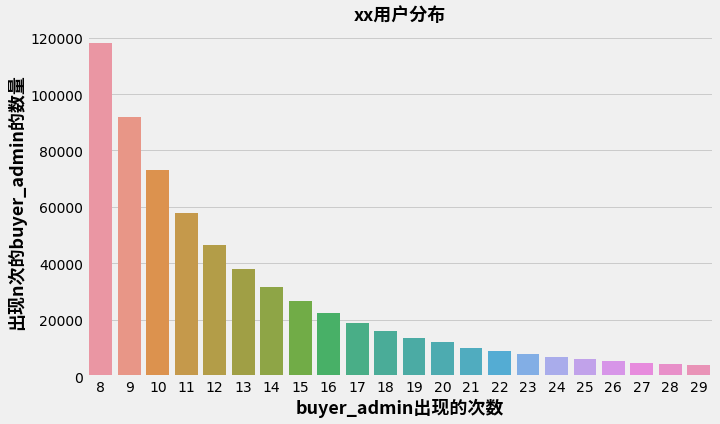

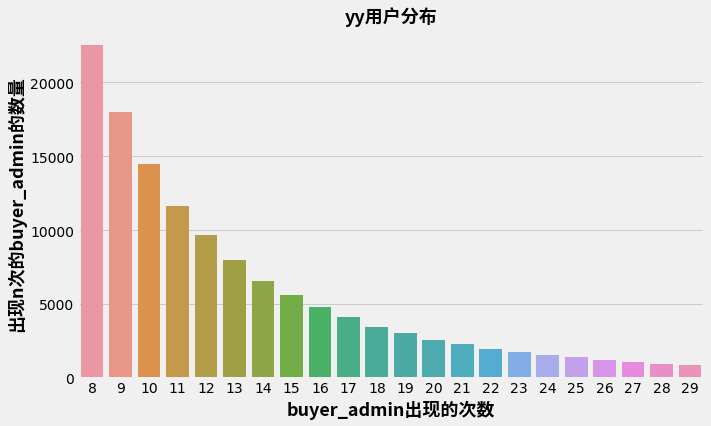

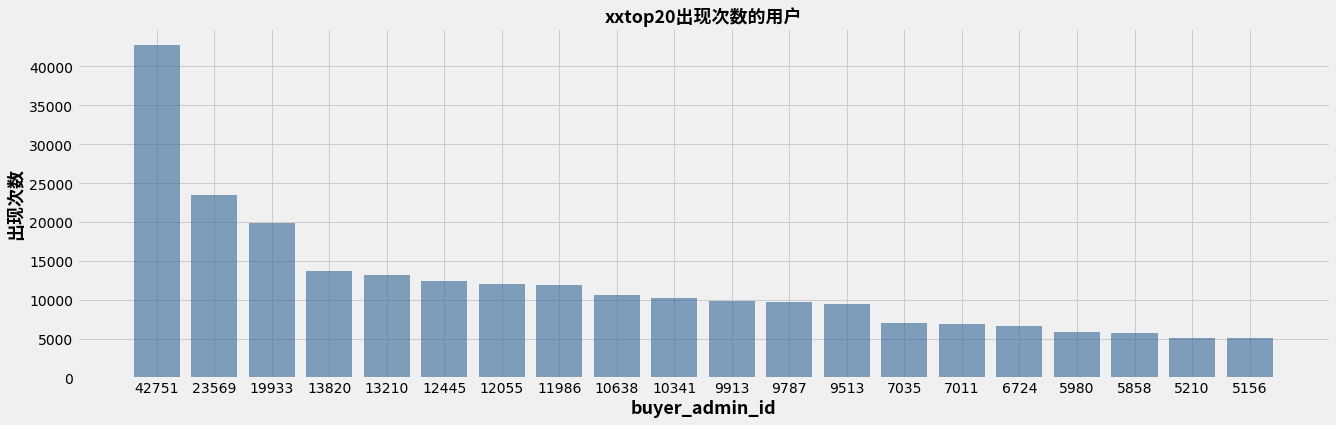

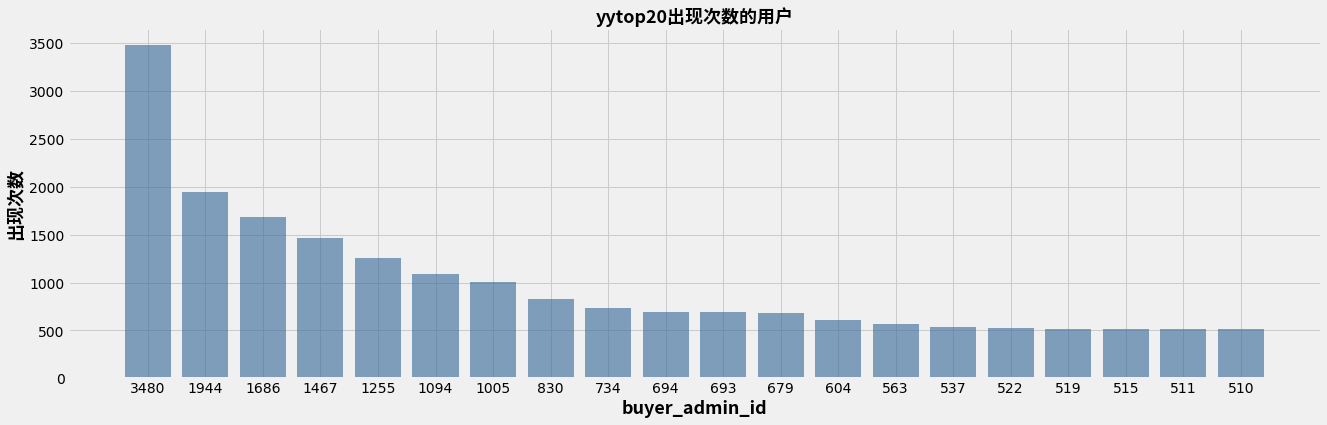

In [14]:
fig, axis1 = plt.subplots(1, 1, figsize=(10, 6))
buyer_admin_num = pd.DataFrame({'buyer_admin_id_num': trainxx['buyer_admin_id'].value_counts().values})
sns.countplot(x='buyer_admin_id_num', data=buyer_admin_num[buyer_admin_num['buyer_admin_id_num'] < 30])
axis1.set_xlabel('buyer_admin出现的次数',fontproperties=myfont)
axis1.set_ylabel('出现n次的buyer_admin的数量',fontproperties=myfont)
axis1.set_title('xx用户分布',fontproperties=myfont)

fig, axis1 = plt.subplots(1, 1, figsize=(10, 6))
buyer_admin_num = pd.DataFrame({'buyer_admin_id_num': trainyy['buyer_admin_id'].value_counts().values})
sns.countplot(x='buyer_admin_id_num', data=buyer_admin_num[buyer_admin_num['buyer_admin_id_num'] < 30])
axis1.set_xlabel('buyer_admin出现的次数',fontproperties=myfont)
axis1.set_ylabel('出现n次的buyer_admin的数量',fontproperties=myfont)
axis1.set_title('yy用户分布',fontproperties=myfont)

fig, axis1 = plt.subplots(1, 1, figsize=(20, 6))
buyer_admin_value = pd.DataFrame(trainxx.buyer_admin_id.value_counts()).reset_index().head(20)
axis1.set_xlabel('buyer_admin_id',fontproperties=myfont)
axis1.set_ylabel('出现次数',fontproperties=myfont)
axis1.set_title('xxtop20出现次数的用户',fontproperties=myfont)
y_pos = np.arange(len(buyer_admin_value))
plt.bar(y_pos, buyer_admin_value['buyer_admin_id'], color=(0.2, 0.4, 0.6, 0.6))
pltz.xticks(y_pos, buyer_admin_value['buyer_admin_id'])
pltz.show()

fig, axis1 = plt.subplots(1, 1, figsize=(20, 6))
buyer_admin_value = pd.DataFrame(trainyy.buyer_admin_id.value_counts()).reset_index().head(20)
axis1.set_xlabel('buyer_admin_id',fontproperties=myfont)
axis1.set_ylabel('出现次数',fontproperties=myfont)
axis1.set_title('yytop20出现次数的用户',fontproperties=myfont)
y_pos = np.arange(len(buyer_admin_value))
plt.bar(y_pos, buyer_admin_value['buyer_admin_id'], color=(0.2, 0.4, 0.6, 0.6))
pltz.xticks(y_pos, buyer_admin_value['buyer_admin_id'])
pltz.show()

In [16]:
for x in ['item_price']:
    print(item_attr[x].value_counts())

200      75872
500      61283
100      33826
400      27670
300      26044
199      18032
1000     16739
700      12028
101      11972
121      11833
499      11437
160      11322
800      11243
151      11080
201      10846
130      10577
150      10435
900      10252
170      10076
600      10004
190       9970
111       9669
140       9654
120       9643
250       9048
126       8653
90        8575
180       8530
501       8368
181       8364
         ...  
17309        1
7062         1
18251        1
13203        1
15250        1
17308        1
10048        1
15251        1
17307        1
19354        1
15248        1
11154        1
19349        1
17296        1
17300        1
9119         1
13213        1
15260        1
19346        1
11167        1
15261        1
13212        1
15262        1
19344        1
15263        1
13214        1
16196        1
14149        1
19345        1
13301        1
Name: item_price, Length: 20230, dtype: int64


Text(0.5, 1.0, '商品价格分布(全部)')

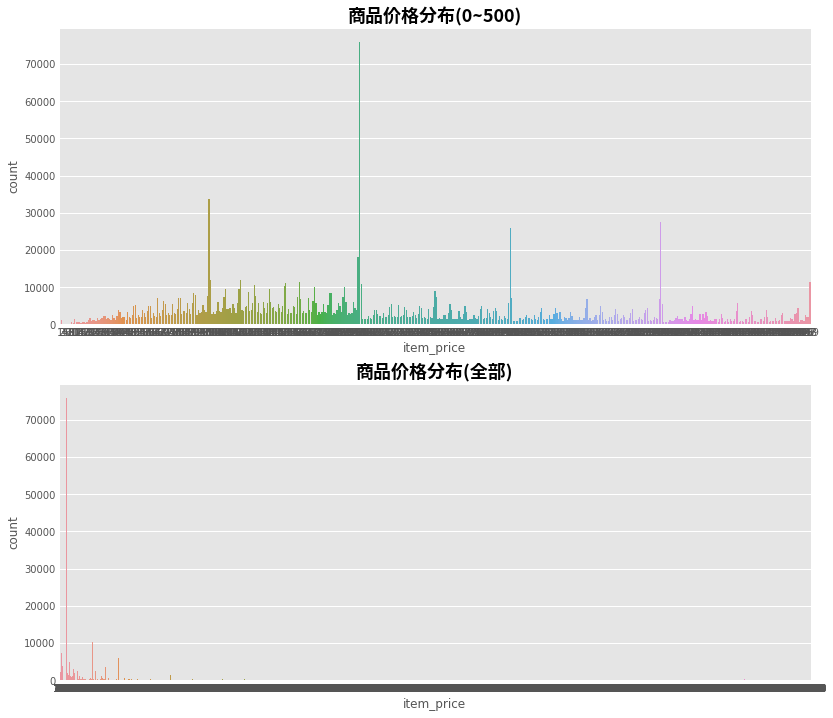

In [4]:
f,ax=plt.subplots(2,1,figsize=(12,12))
sns.countplot('item_price',data=item_attr[item_attr['item_price'] < 500],ax = ax[0])
ax[0].set_title('商品价格分布(0~500)',fontproperties=myfont)

sns.countplot('item_price',data=item_attr,ax = ax[1])
ax[1].set_title('商品价格分布(全部)',fontproperties=myfont)


In [7]:
fig, axis1 = plt.subplots(1, 1, figsize=(20, 6))
item_price_value = pd.DataFrame(item_attr.item_price.value_counts()).reset_index().head(20)
# print(item_price_value)
axis1.set_xlabel('item_price',fontproperties=myfont)
axis1.set_ylabel('出现次数',fontproperties=myfont)
axis1.set_title('yytop20出现次数的价格',fontproperties=myfont)
y_pos = np.arange(len(item_price_value))
plt.bar(y_pos, item_price_value['item_price'], color=(0.2, 0.4, 0.6, 0.6))
pltz.xticks(y_pos, item_price_value['index'])
pltz.show()

In [8]:
plt.style.use('ggplot')
f,ax=plt.subplots(1,1,figsize=(14,18))
plt.tight_layout(5)
sns.distplot(train['create_order_time'])
ax.set_title('购物时间分布(全部)',fontproperties=myfont)

In [ ]:
plt.style.use('ggplot')
f,ax=plt.subplots(2,1,figsize=(14,18))
plt.tight_layout(5)
sns.boxplot(y=item_attr['item_price'],ax = ax[0])
sns.distplot(item_attr['item_price'],ax=ax[1])
ax[0].set_title('商品价格',fontproperties=myfont)
